# **Slip 11 - Data Mining**


Q1. Write a R program to find all elements of a given list that are not inanother given list.

AB st("x", "y", "z")
st("X", "Y", "Z", " x", "y", "z")

[10 Marks]

In [ ]:
l1 <- c("x", "y", "z", "w")
l2 <- c("X", "Y", "Z", "x", "y", "z")
cat("Elements in l1 but not in l2:", setdiff(l1, l2), "\n")

Elements in l1 but not in l2: w 


*Q2. Write a python program to implement hierarchical clustering algorithm.(Download
Wholesale customers data dataset from github.com).
[20 Marks]*

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


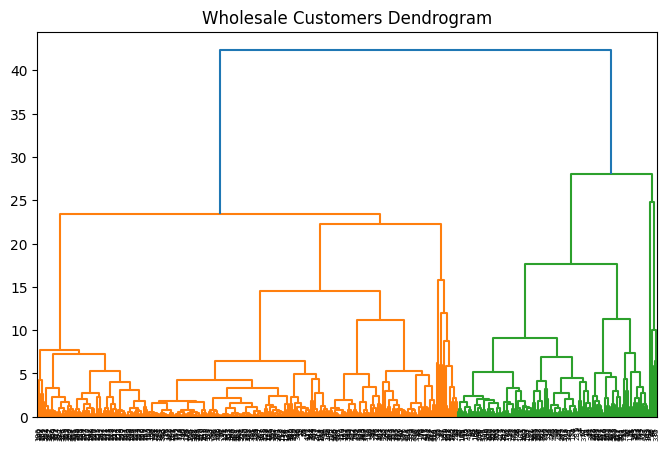

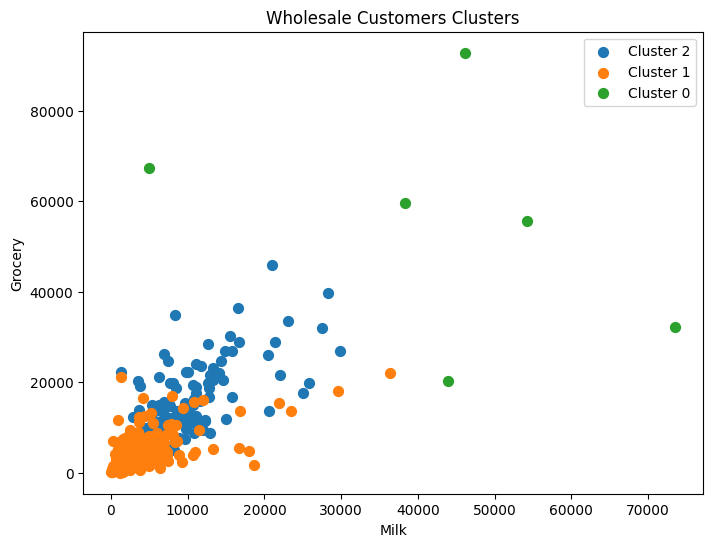

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

df = pd.read_csv("Wholesale customers data.csv")
print(df.head())

X = df.select_dtypes(include="number")
X_scaled = StandardScaler().fit_transform(X)

# Dendrogram
plt.figure(figsize=(8,5))
Z = linkage(X_scaled, method='ward')
dendrogram(Z)
plt.title("Wholesale Customers Dendrogram")
plt.show()

# Agglomerative Clustering
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['Cluster'] = model.fit_predict(X_scaled)

# Scatter plot of two features with cluster labels
plt.figure(figsize=(8,6))
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Milk'], cluster_data['Grocery'], label=f'Cluster {cluster}', s=50)

plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.title('Wholesale Customers Clusters')
plt.legend()
plt.show()
